[[0.99089925]]  - Correct:  1
[[0.006409]]  - Correct:  0


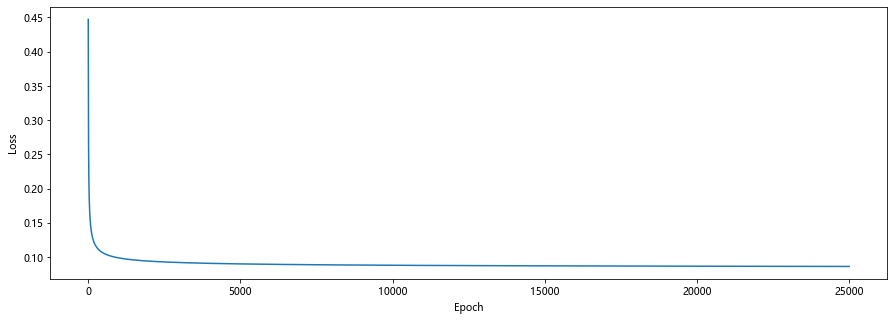

In [29]:
import numpy as np # helps with the math
import matplotlib.pyplot as plt # to plot error during training
import pandas as pd

df = pd.read_excel("空氣品質.xlsx")
def loadCSVfile2():
    
    df = pd.read_excel("空氣品質.xlsx", dtype=np.str, delimiter=",")    
    #tmp = np.loadtxt("detaset.csv", dtype=np.str, delimiter=",")
    data = df[1:,1:].astype(np.float)#加载数据部分
    label = df[1:,0].astype(np.float)#加载类别标签部分
    return data, label 

df=df.values
#inputs=df[1:,5:].astype(np.float)
print
# # input data
# inputs = np.array([[0, 1, 0],
#                    [0, 1, 1],
#                    [0, 0, 0],
#                    [1, 0, 0],
#                    [1, 1, 1],
#                    [1, 0, 1]])
# # output data
# outputs = np.array([[0], [0], [0], [1], [1], [1]])

# create NeuralNetwork class
class NeuralNetwork:

    # intialize variables in class
    def __init__(self, data, table):
        self.inputs  = data
        self.outputs = table
        # initialize weights as .50 for simplicity
        self.weights = np.array([[.50], [.50], [.50]])
#         self.weights = np.array([[.50], [.50]])
        self.error_history = []
        self.epoch_list = []

    #activation function ==> S(x) = 1/1+e^(-x)
    def sigmoid(self, x, deriv=False):
        if deriv == True:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    # data will flow through the neural network.
    def feed_forward(self):
        self.hidden = self.sigmoid(np.dot(self.inputs, self.weights))

    # going backwards through the network to update weights
    def backpropagation(self):
        self.error  = self.outputs - self.hidden
        delta = self.error * self.sigmoid(self.hidden, deriv=True)
        self.weights += np.dot(self.inputs.T, delta)

    # train the neural net for 25,000 iterations
    def train(self, epochs=25000):
        for epoch in range(epochs):
            # flow forward and produce an output
            self.feed_forward()
            # go back though the network to make corrections based on the output
            self.backpropagation()    
            # keep track of the error history over each epoch
            self.error_history.append(np.average(np.abs(self.error)))
            self.epoch_list.append(epoch)

    # function to predict output on new and unseen input data                               
    def predict(self, new_input):
        prediction = self.sigmoid(np.dot(new_input, self.weights))
        return prediction

# create neural network   
NN = NeuralNetwork(inputs, outputs)
# train neural network
NN.train()

# create two new examples to predict                                   
example = np.array([[1, 1, 0]])
example_2 = np.array([[0, 1, 1]])
# example = np.array([[1, 0]])
# example_2 = np.array([[0, 1]])

# print the predictions for both examples                                   
print(NN.predict(example), ' - Correct: ', example[0][0])
print(NN.predict(example_2), ' - Correct: ', example_2[0][0])

# plot the error over the entire training duration
plt.figure(figsize=(15,5))
plt.plot(NN.epoch_list, NN.error_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [10]:
import numpy as np # helps with the math
import matplotlib.pyplot as plt # to plot error during training
import pandas as pd

df = pd.read_excel("空氣品質.xlsx")
df.head()

,統計期,統計區,總站日數,良好站日數,普通站日數,對敏感族群不健康站日數,對所有族群不健康站日數,非常不健康站日數,危害站日數,AQI>100日數比率
0,108年 7月,連江縣,31,25,6,0,0,0,0,0.00
1,108年 7月,金門縣,31,23,8,0,0,0,0,0.00
2,108年 7月,嘉義市,31,28,2,1,0,0,0,3.23
3,108年 7月,新竹市,31,29,2,0,0,0,0,0.00
4,108年 7月,基隆市,31,30,1,0,0,0,0,0.00


[[0.99089925]]  - Correct:  1
[[0.006409]]  - Correct:  0


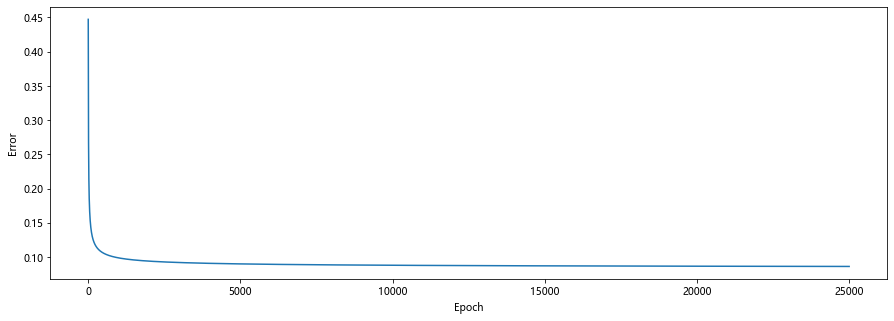

In [28]:
import numpy as np # helps with the math
import matplotlib.pyplot as plt # to plot error during training

# input data
inputs = np.array([[0, 1, 0],
                   [0, 1, 1],
                   [0, 0, 0],
                   [1, 0, 0],
                   [1, 1, 1],
                   [1, 0, 1]])
# output data
outputs = np.array([[0], [0], [0], [1], [1], [1]])

# create NeuralNetwork class
class NeuralNetwork:

    # intialize variables in class
    def __init__(self, inputs, outputs):
        self.inputs  = inputs
        self.outputs = outputs
        # initialize weights as .50 for simplicity
        self.weights = np.array([[.50], [.50], [.50]])
        self.error_history = []
        self.epoch_list = []

    #activation function ==> S(x) = 1/1+e^(-x)
    def sigmoid(self, x, deriv=False):
        if deriv == True:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    # data will flow through the neural network.
    def feed_forward(self):
        self.hidden = self.sigmoid(np.dot(self.inputs, self.weights))

    # going backwards through the network to update weights
    def backpropagation(self):
        self.error  = self.outputs - self.hidden
        delta = self.error * self.sigmoid(self.hidden, deriv=True)
        self.weights += np.dot(self.inputs.T, delta)

    # train the neural net for 25,000 iterations
    def train(self, epochs=25000):
        for epoch in range(epochs):
            # flow forward and produce an output
            self.feed_forward()
            # go back though the network to make corrections based on the output
            self.backpropagation()    
            # keep track of the error history over each epoch
            self.error_history.append(np.average(np.abs(self.error)))
            self.epoch_list.append(epoch)

    # function to predict output on new and unseen input data                               
    def predict(self, new_input):
        prediction = self.sigmoid(np.dot(new_input, self.weights))
        return prediction

# create neural network   
NN = NeuralNetwork(inputs, outputs)
# train neural network
NN.train()

# create two new examples to predict                                   
example = np.array([[1, 1, 0]])
example_2 = np.array([[0, 1, 1]])

# print the predictions for both examples                                   
print(NN.predict(example), ' - Correct: ', example[0][0])
print(NN.predict(example_2), ' - Correct: ', example_2[0][0])

# plot the error over the entire training duration
plt.figure(figsize=(15,5))
plt.plot(NN.epoch_list, NN.error_history)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()

In [25]:
import pandas as pd

# 截至 2016-12-14 上午 11 時第 8 屆 iT 邦幫忙各組的鐵人分別是 59、9、19、14、6 與 77 人
groups = ["Modern Web", "DevOps", "Cloud", "Big Data", "Security", "自我挑戰組"]
ironmen = [59, 9, 19, 14, 6, 77]

ironmen_dict = {
                "groups": groups,
                "ironmen": ironmen
}

ironmen_df = pd.DataFrame(ironmen_dict)
ironmen_df

,groups,ironmen
0,Modern Web,59
1,DevOps,9
2,Cloud,19
3,Big Data,14
4,Security,6
5,自我挑戰組,77
